---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [40]:
# 二項分布，bin(n,p) n→總實驗次數 p→成功機率
np.random.binomial(10, 0.5) #結果：成功是1失敗是0，重複10次成功總次數

6

In [26]:
np.random.binomial(1000, 0.5)/1000 #實驗1000次成功總次數/1000

0.498

In [48]:
# 丟公平硬幣20次，重複這事件10000次
x = np.random.binomial(20, .5, 10000)
print(x)
print((x>=15).mean())
np.count_nonzero(x>=15)

[10 10 10 ...  8 10 10]
0.0209


209

In [49]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

17

In [55]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
# 1000000天中，連續2天有發生龍捲風的次數   
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

103 tornadoes back to back in 2739.72602739726 years


In [67]:
np.random.uniform(0, 1)

0.7107115471695982

In [79]:
np.random.normal(0.75)

1.1950845807384887

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

#### Normal distribution
N($\mu$=0.75,$\sigma$=1)，抽1000個樣本

In [214]:
distribution = np.random.normal(0.75,size=1000) 
np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution)) #standard deviation=1

1.0428705882260418

In [215]:
np.std(distribution)

1.0428705882260418

In [216]:
import scipy.stats as stats
stats.kurtosis(distribution) #峰度，負值：tail較常態分佈平坦(flat)，正值：tail較高於常態分布

0.022689908456157593

In [218]:
stats.skew(distribution) #skew(偏斜)，峰值偏左(正)或偏右(負)

-0.01946805893914979

In [219]:
#卡方
chi_squared_df2 = np.random.chisquare(2, size=10000) #自由度為2
stats.skew(chi_squared_df2)

1.9910542860079892

In [220]:
chi_squared_df5 = np.random.chisquare(5, size=10000) #自由度為5
stats.skew(chi_squared_df5) 

1.3593237215954084

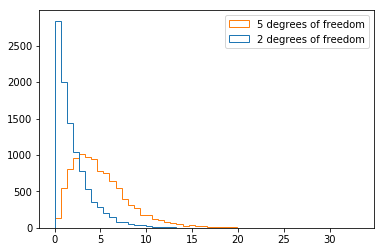

In [222]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


#### modality (峰度)
- bimodal(雙峰) <br>
我們可以用兩個帶有不同參數的常態分佈模仿雙峰<br>
→ 高斯混合(Gaussian Mixture)模型，分群(clustring)常用到


# Hypothesis Testing

In [ ]:
df = pd.read_csv('grades.csv')

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [ ]:
early.mean()

In [ ]:
late.mean()

In [ ]:
from scipy import stats
stats.ttest_ind?

In [ ]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

In [ ]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

In [ ]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])